In [1]:
import pandas as pd
pd.set_option('max_colwidth', 400)
from IPython.display import display
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Moscow public catering market

The study of the market of catering in Moscow is carried out by order of potential investors of a business project, within the framework of which it is supposed to organize a cafe or a chain of cafes, where robots will be used instead of service personnel. The purpose of this analysis is to find out what main niches exist in the restaurant business today, what is typical for them (what type of distribution, what areas, how many seats, etc.). The ultimate goal of the project is to give recommendations to customers and to summarize the main conclusions of the analysis of the current state of affairs in the market.


### Contents:

[Data upload](#chapter1)

[Data analysis](#chapter2)

 * [Differences between types of the catering places](#section1)
 * [Streets full of catering](#section2)
 * [Restaurants](#section3)
 * [Cafes](#section4)
 * [Fast Food](#section5)
 * [Canteens](#section6)
 * [Bars](#section7)
 * [The only place for catering in the street](#section8)
 * [Quantity of seats in the streets with the plenty of caterung places](#section9)
 
[Conclusion](#chapter3)

## Data upload <a id="chapter1"></a>

In [2]:
data = pd.read_csv('rest_data.csv')
display(data.head())

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
None


In [4]:
# Let's check the unique values for columns 'chain' and 'object_type' 
print(data.chain.unique())

['нет' 'да']


In [5]:
print(data.object_type.unique())

['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']


In [6]:
# We are changing the column names to make them simplier and more understandable
data = data.rename(columns = {'object_name' : 'name', 'object_type' : 'type', 'number': 'seats'})
display(data.head())

,id,name,chain,type,address,seats
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [7]:
# Let's check if duplicates can be found in the table. Some places can work as cafes and restaurants in evening
# and as canteens in morning. That's why we won't count as duplicates all the cases
# where we have the same address and the same name: we need to check also the type of them.

name_type_address = data[['name', 'type', 'address']]
print(name_type_address.duplicated().sum())

171


In [8]:
# Let' s make table 'duplicated' with column named 'duplicated' with results of duplicated() function
duplicated = pd.DataFrame(name_type_address.duplicated(), columns =['duplicated'])
# Let's join the table duplicated to the data
data = data.join(duplicated)
display(data.head(15))

,id,name,chain,type,address,seats,duplicated
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,False
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,False
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,False
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,False
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,False
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240,False
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,False
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90,False
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150,False
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120,False


In [9]:
# Let's remove the duplicates we have just found
data = data.drop(data[data['duplicated'] == True].index).reset_index(drop=True)
# Now we can drop the column 'duplicated' since we don't need it no more
data = data.drop('duplicated', 1)
print(data.shape)

(15195, 6)


In [10]:
# Let's give english names for types of catering and chain categories
data.chain = data.chain.map({'да': 'chain', 'нет': 'non-chain'})
data.type = data.type.map({'магазин (отдел кулинарии)': 'cookery', 'предприятие быстрого обслуживания': 'fast food','кафе': 'cafe', 'ресторан': 'restaurant', 'бар': 'bar','кафетерий': 'cafeteria', 'буфет': 'buffet', 'столовая': 'canteen', 'закусочная': 'eatery'})
display(data.head(15))

,id,name,chain,type,address,seats
0,151635,СМЕТАНА,non-chain,cafe,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,non-chain,cafe,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,non-chain,cafe,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,chain,cafe,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,non-chain,cafe,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,non-chain,canteen,"город Москва, Абрамцевская улица, дом 15, корпус 1",240
6,148815,Брусника,chain,cafe,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,non-chain,canteen,"город Москва, Авиамоторная улица, дом 8, строение 1",90
8,20958,КПФ СЕМЬЯ-1,non-chain,canteen,"город Москва, Авиамоторная улица, дом 8, строение 1",150
9,28858,Столовая МТУСИ,non-chain,canteen,"город Москва, Авиамоторная улица, дом 8, строение 1",120


The data is correct, correct types, there are no fields without data, the names of the columns and the names of the catering places were changed. Duplicates were removed.

## Data Analysis <a id="chapter2"></a>

### Differences between types of catering places: the quantity of restaurants, the quantity of seats, the differences between  chain and non-chain places. <a id="section1"></a>

In [11]:
# Let's create the table for different types of chain and non-chain restaurants, where we'll calculate
# quantity and mean number of seats for every type.
types = data.groupby(['type', 'chain'], as_index = False).agg({'id': 'count', 'seats': 'mean'})
types = types.rename(columns = {'id': 'restaurants'})      
display(types.head())

,type,chain,restaurants,seats
0,bar,chain,37,53.027027
1,bar,non-chain,816,43.175245
2,buffet,chain,11,12.727273
3,buffet,non-chain,560,52.335714
4,cafe,chain,1389,47.389489


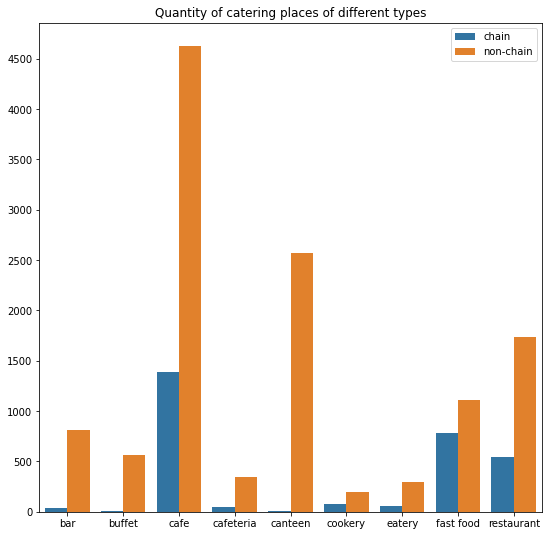

In [12]:
# Let's build a graph of quantity of catering places of different types, chain and non-chain
plt.figure(figsize=(9, 9))
ax = sns.barplot(x = 'type', y = 'restaurants', data = types, hue = 'chain')
plt.legend()
ax.set_yticks([i for i in range(0, 5000, 500)])
ax.set_xlabel('')
ax.set_ylabel("")
plt.title("Quantity of catering places of different types")
plt.show()

1. The most often types are cafes (more than 6000 pieces), canteens (about 2600), restaurants (about 2300) and fast food (about 2000). There are few bars, less than 1000, and we can see the same quantity of buffets, every other type has no more than 500 pieces.

2. Non-chain catering prevail, but we can see big share of the chain it the fast food type.

In [13]:
# Let's check the proportion of chain and non-chain catering.
is_chain = types.groupby('chain').agg({'restaurants' : 'sum'})
display(is_chain)
print()
# Let's know how many seats are in chain and non-chain catering in Moscow
chain_seats = data.groupby('chain').agg({'seats': 'sum'}).sort_values(by='chain', ascending = False)
display(chain_seats)

,restaurants
chain,
chain,2950
non-chain,12245


,seats
chain,
non-chain,753798
chain,156377


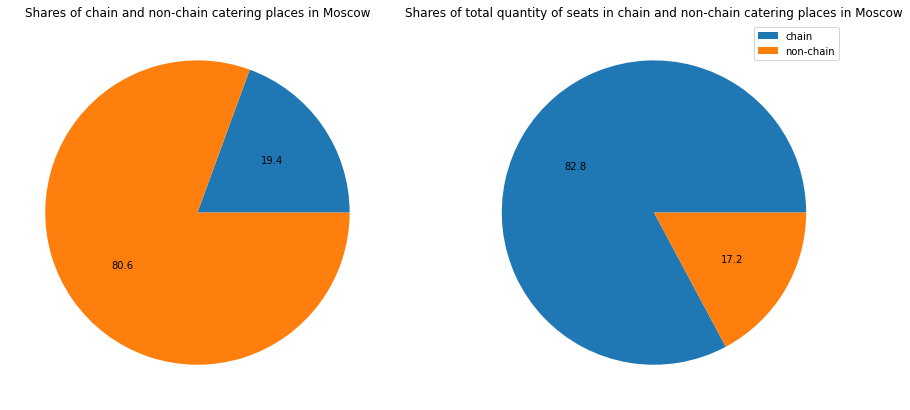

In [14]:
# Let's create a pie chart for shares of chain and non-chain catering
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
is_chain.restaurants.plot(kind = 'pie', autopct='%.1f', labels = ['', ''])
plt.ylabel("")
plt.title('Shares of chain and non-chain catering places in Moscow')

# Let' s create a pie chart for total quantity of seats in chain and non-chain catering
# plt.figure(figsize = (5, 5))
plt.subplot(1, 2, 2)
chain_seats.seats.plot(kind = 'pie', autopct='%.1f', labels = ['', ''])
plt.legend(['chain', "non-chain"])
plt.ylabel("")
plt.title('Shares of total quantity of seats in chain and non-chain catering places in Moscow')
plt.show()

Comparison of chain and non-chain catering, as for quantity of catering places so for total quantity of seats in these two types of catering, defines that share of non-chain catering is more than 80%. Now we should check the mean number of seats in places of each kind of catering.

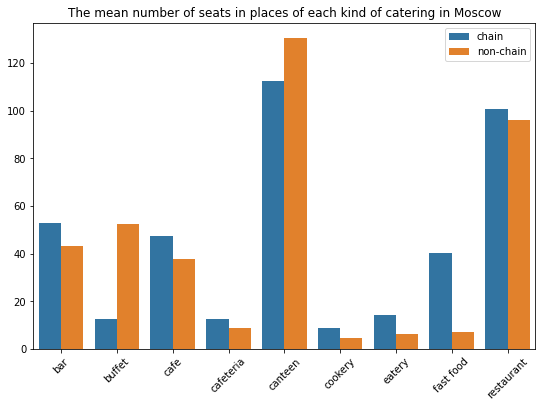

In [15]:
# Graph of the mean number of seats in places of each kind of catering
plt.figure(figsize=(9, 6))
ax = sns.barplot(x = 'type', y = 'seats', data = types, hue = 'chain')
plt.xticks(rotation = 45)
plt.legend()
ax.set_xlabel('')
ax.set_ylabel("")
plt.title("The mean number of seats in places of each kind of catering in Moscow")
plt.show()

In [16]:
only_chains = data.query('chain == "yes"')
chains_grouped = only_chains.groupby('name', as_index = False).agg({'id': 'count', 'seats': 'mean'}).sort_values(by='name')
chains_grouped = chains_grouped.rename(columns={'id':'restaurants'})
print("Median quantity of catering places in the chain: " + str(chains_grouped.restaurants.median()))
print("Median of avereage seats in the chain place: " + str(chains_grouped.seats.median()))

Median quantity of catering places in the chain: nan
Median of avereage seats in the chain place: nan


At least half of the chains in Moscow have one place. This, at first glance, is strange: there must be more than one place in the chain, otherwise it is not a chain. Obviously, in this case, these are very young networks, for example, networks that came to Moscow from other regions and have not yet spread, or (yet) do not consider Moscow to be their main market. We can find here some networks that have spread throughout the Moscow region, represented in the city by one piece. In the latter case, their cafe is part of the network for a given region. One way or another, chains with too few cafes hinder an adequate analysis of the business strategy of chains that want to develop in Moscow. Such chains have few cafes, not necessarily because they decided to win the market by the number of seats, not places. Rather, they simply have not yet developed enough, or have not even decided whether they want to develop in Moscow. It makes sense to single out the segment of chains that exist in Moscow, not because they decided "to look in the city": let's make a data slice where there will be chains with at least 5 places.

In [17]:
true_chains = chains_grouped.query('restaurants > 4')
print("Median quantity of catering places in the chain: " + str(true_chains.restaurants.median()))
print("Median of avereage seats in the chain place: " + str(true_chains.seats.median()))

Median quantity of catering places in the chain: nan
Median of avereage seats in the chain place: nan


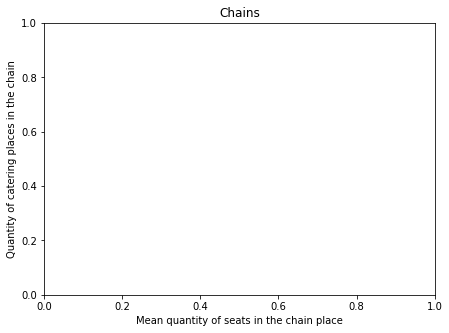

In [18]:
plt.figure(figsize = (7, 5))
sns.scatterplot(x = 'seats', y = 'restaurants', data = true_chains)
plt.xlabel('Mean quantity of seats in the chain place')
plt.ylabel('Quantity of catering places in the chain')
plt.title('Chains')
plt.show()

1. Canteens and restaurants have more seats than other catering types (about 100 per 1 place). Bars, cafes, chain fast food, and non-chain buffets have two times less seats per place (40-60 on the average). Other types of catering have no more than 20 seats (on the average) per place.

2. For the most types of catering the average number of seats is the same for chain and non-chain categories.

3. There are three exceptions: non-chain buffets are on the average bigger than chain ones, unlike eateries and fast food. Chain fast food  is many times bigger than non-chain one. Bearing in mind that share of chain fast food places is not much less than share of non-chain places of it, we can say that sum seats in chain places is more than in non-chain places of fast food.

### The streets full of catering <a id="section2"></a>

In [19]:
# Empty list for street names for every record in the table
streets = []

for row in data['address']:
    # Making list of elements of every address
    parts = row.split(', ')
    # if town is not mentioned first, the first element is street
    if "город" not in parts[0]:
        streets.append(parts[0])
    # Otherwise, if town or settlement is not mentioned second, street is the second
    elif "город" not in parts[1] and "поселение" not in parts[1]:
        streets.append(parts[1])
    # Otherwise, if the third element is no settlement, nor village, then it is a street
    elif "поселение" not in parts[2] and "посёлок" not in parts[2]:
        streets.append(parts[2])
    # Otherwise, street is the fourth element
    else:
        streets.append(parts[3])

# Let's check the length of the table to make sure our logics are correct       
assert(len(streets) == len(data))

In [20]:
# Let's make dataframe from the list of streets
street = pd.DataFrame(data = streets, columns = ['street'])

In [21]:
display(street.head())

,street
0,улица Егора Абакумова
1,улица Талалихина
2,Абельмановская улица
3,Абрамцевская улица
4,Абрамцевская улица


In [22]:
# Let's join two tables on index
new_data = data.join(street)
display(new_data.head())

,id,name,chain,type,address,seats,street
0,151635,СМЕТАНА,non-chain,cafe,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,non-chain,cafe,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,non-chain,cafe,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,chain,cafe,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,non-chain,cafe,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


In [23]:
# Let's group data by street and sort it descending
by_street = new_data.groupby('street', as_index=False)['id'].count().sort_values(by = 'id', ascending=False).reset_index(drop=True)
top_ten_streets = by_street.head(10)

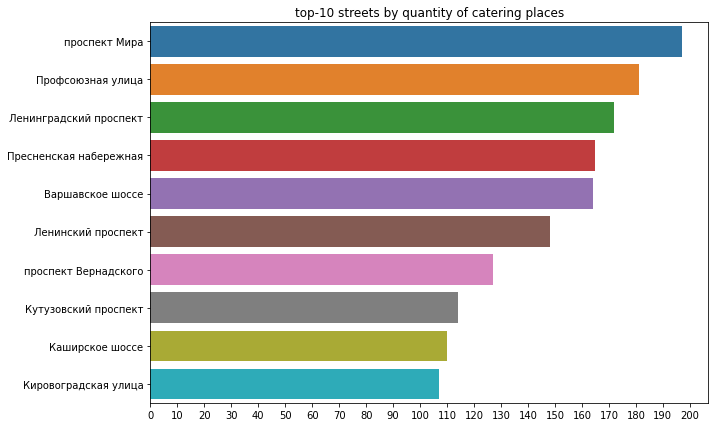

In [24]:
# Let's build a graph of top-10 streets by quantity of catering places
plt.figure(figsize=(10, 7))
sns.barplot(y='street', x = 'id', data = top_ten_streets)
plt.ylabel('')
plt.xlabel('')
plt.xticks([x for x in range(0, 201, 10)])
plt.title("top-10 streets by quantity of catering places")
plt.show()

In [25]:
# We'll use outsource data to make list of areas where these top-10 streets go
from io import BytesIO
import requests
spreadsheet_id = "1IJHGwt6shBsMKiqT1BmOrKp__qyABMVbuCDKrzrj2RQ"
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
mosgaz = pd.read_csv(BytesIO(r.content))
display(mosgaz.head())

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [26]:
# List of areas:
my_areas = mosgaz.query('streetname in @top_ten_streets.street')
print(my_areas.area.unique())

['Пресненский район' 'Район Дорогомилово' 'Район Фили-Давыдково'
 'Район Проспект Вернадского' 'Район Раменки' 'Район Тропарево-Никулино'
 'Район Аэропорт' 'Район Беговой' 'Хорошевский район' 'Район Сокол'
 'Алексеевский район' 'Ярославский Район' 'Район Марьина роща'
 'Останкинский район' 'Район Ростокино' 'Район Свиблово'
 'Район Чертаново Центральное' 'Район Чертаново Северное'
 'Район Чертаново Южное' 'Донской район' 'Район Москворечье-Сабурово'
 'Район Нагатино-Садовники' 'Нагорный район'
 'Район Орехово-Борисово Южное' 'Район Орехово-Борисово Северное'
 'Академический район' 'Район Черемушки' 'Район Гагаринский'
 'Район Ясенево' 'Район Коньково' 'Ломоносовский район'
 'Обручевский район' 'Район Северное Бутово' 'Район Теплый Стан'
 'Район Южное Бутово' 'Район Якиманка' 'Мещанский район']


The 10 streets with the largest number of catering places are the main thoroughfares of the city connecting the outskirts with the center, with the exception of Kirovogradskaya Street, which is located in the south of Moscow, and Presnenskaya Embankment, in the Moscow City Business Center area. These 10 streets pass through 37 districts of the city. However, it is interesting to consider the top 10 streets by quantity of restaurants, bars, cafes, and other types of catering separetely. These lists may differ from each other and from the one we have already done.

In [27]:
# Let's make a pivot table, where streets will form the rows, types of catering will be columns,
# and quantity of them will be values

new_data_pivot = new_data.pivot_table(index = 'street', columns = 'type', values = 'id', aggfunc = 'count')
new_data_pivot = new_data_pivot.fillna(0).astype('int')
display(new_data_pivot.head(10))

type,bar,buffet,cafe,cafeteria,canteen,cookery,eatery,fast food,restaurant
street,,,,,,,,,
1-й Автозаводский проезд,0,0,1,1,0,0,0,0,1
1-й Амбулаторный проезд,0,0,0,0,2,0,0,0,0
1-й Балтийский переулок,0,0,0,0,0,0,0,0,1
1-й Басманный переулок,0,0,0,0,1,0,0,0,0
1-й Ботанический проезд,0,0,0,0,1,0,0,0,0
1-й Боткинский проезд,0,1,2,0,0,0,0,1,0
1-й Варшавский проезд,0,0,0,0,2,0,0,0,0
1-й Вешняковский проезд,0,0,0,0,1,0,0,0,0
1-й Волоколамский проезд,0,0,3,0,1,0,0,0,0


### Restaurants <a id="section3"></a>

In [28]:
# Function for building graphs for top-10 streets and a type of catering (as argument).
def make_some_plots(rest_type):
    # Let' sort pivot table by one of the types of catering and extract top 10 rows
    df = new_data_pivot.sort_values(by = rest_type, ascending = False).head(10).reset_index()
    # Graph: x - street, y - a type of catering
    plt.figure(figsize =(10, 7))
    sns.barplot(x = 'street', y = rest_type, data = df)
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(rotation = 60)

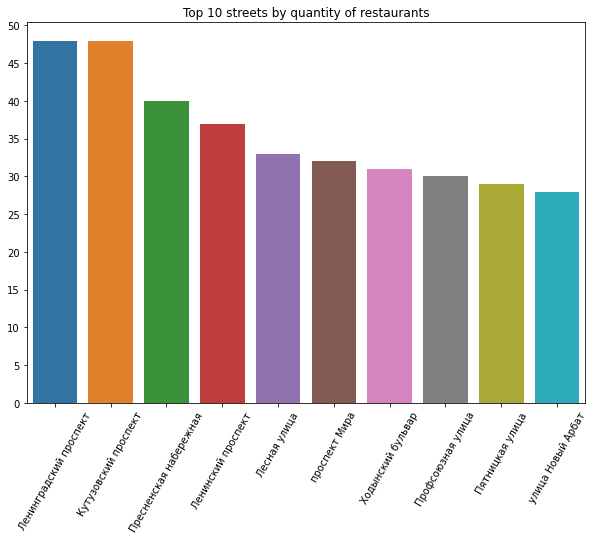

In [29]:
make_some_plots('restaurant')
plt.yticks([x for x in range(0, 51, 5)])
plt.title("Top 10 streets by quantity of restaurants")
plt.show()

The top 10 streets for restaurants included some streets of the center: Lesnaya, Pyatnitskaya, Novy Arbat. Khodynsky Boulevard also appeared here - it is not far from the center, but it's located not in the Central, but in the Northern Autonomous District, it's close to "Dynamo" metro station. These areas are also quite wealthy.

### Cafes<a id="section4"></a>

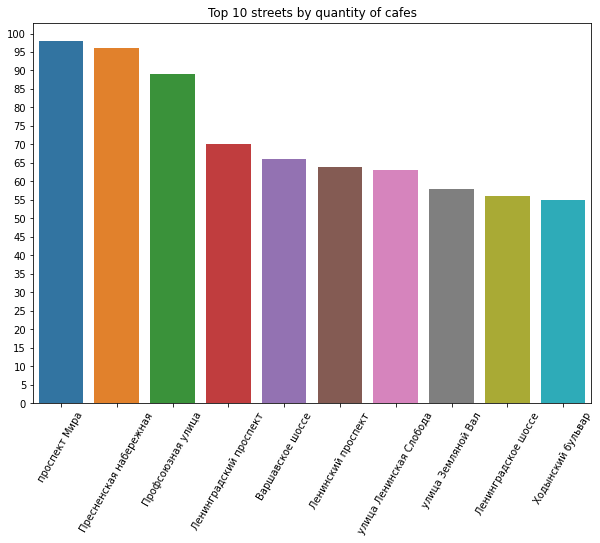

In [30]:
make_some_plots('cafe')
plt.yticks([x for x in range(0, 101, 5)])
plt.title("Top 10 streets by quantity of cafes")
plt.show()

In the top 10 there are no streets in the very center, except for a piece of the Garden Ring - Zemlyanoy Val. It includes also Khodynsky Boulevard and Leninskaya Sloboda Street. But generally the list is the same as the  list which includes all types of catering places, which is not surprising, because the cafe is the largest type.

### Fast food <a id="section5"></a> 

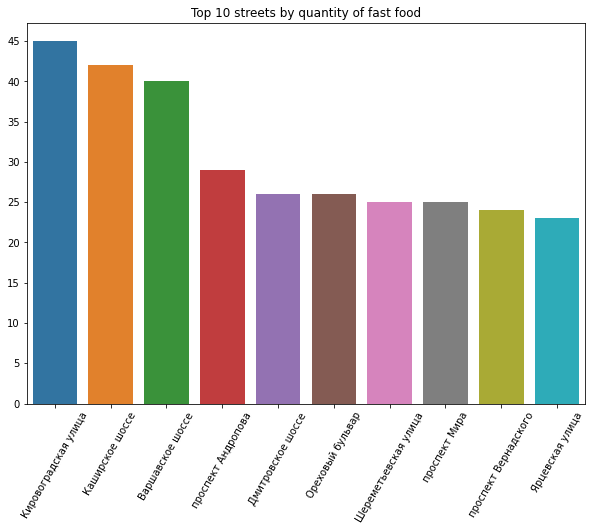

In [31]:
make_some_plots('fast food')
plt.yticks([x for x in range(0, 46, 5)])
plt.title("Top 10 streets by quantity of fast food")
plt.show()

One can find lots of fast food in big streets in the outskirts, especially in the south and north-east of Moscow: these are the most populated areas of the city.

### Canteens <a id="section6"></a>

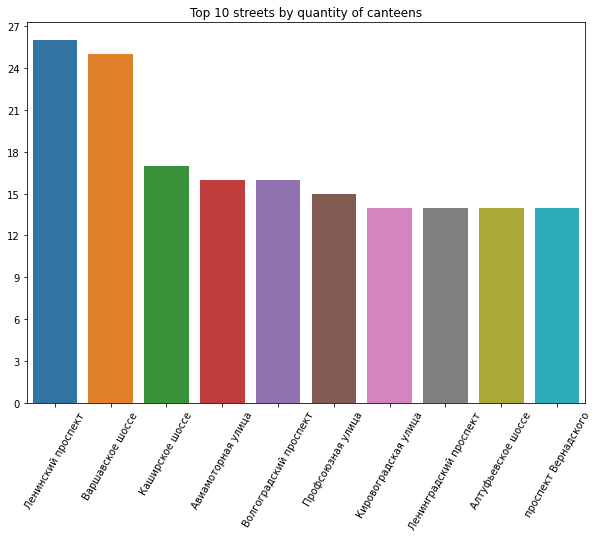

In [32]:
make_some_plots('canteen')
plt.yticks([x for x in range(0, 28, 3)])
plt.title("Top 10 streets by quantity of canteens")
plt.show()

Canteens are usually visited during a break at work or at schools, for example. This top contains the longest streets.  Aviamotornaya, Volgogradsky Prospekt, Altufevskoe Highway are going through in industrial areas.

### Bars <a id="section7"></a>

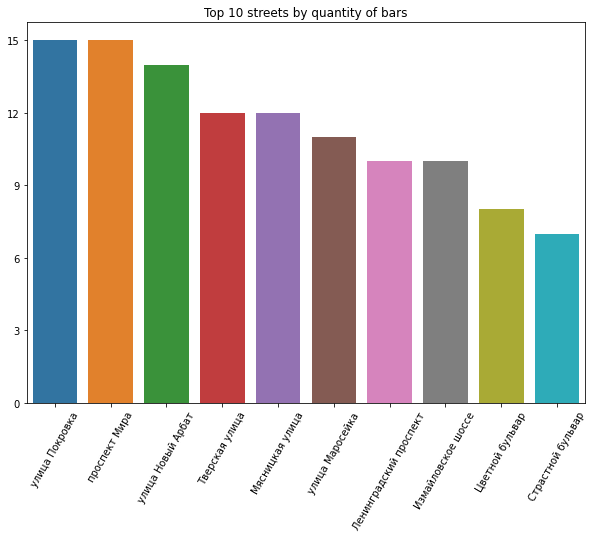

In [33]:
make_some_plots('bar')
plt.yticks([x for x in range(0, 16, 3)])
plt.title("Top 10 streets by quantity of bars")
plt.show()

Bars are mostly located in the center, in places for young people, tourists, etc. Eight streets out of ten are within Sadovoe, including Tverskaya, Pokrovka, Myasnitskaya, boulevards - the most popular tourist places. Izmailovskoye Highway - a bit surprising, it's far from the center. However, Izmailovo is an old district, next to a park, beautiful place for walking.

### The only place for catering in the street <a id="section8"></a>

In [34]:
# Let's make query for streets where the only place of catering is located
only_one = by_street.query('id == 1')
# The first twenty streets of the list:
display(only_one.head(20))
# The number of such streets and the whole number of Moscow streets:
print(len(only_one))
print(new_data.street.nunique())

,street,id
1419,6-я улица Новые Сады,1
1420,улица Константинова,1
1421,Несвижский переулок,1
1422,6-я улица Лазенки,1
1423,улица Льва Яшина,1
1424,Неманский проезд,1
1425,Симферопольский проезд,1
1426,Нелидовская улица,1
1427,Синельниковская улица,1
1428,Научный проезд,1


722
2141


In [35]:
# The areas where the streets with the only place of catering are located:
lots_of_areas = mosgaz.query('streetname in @only_one.street')
print(lots_of_areas.area.unique())

['Пресненский район' 'Таганский район' 'Тверской район' 'Район Арбат'
 'Район Замоскворечье' 'Район Богородское' 'Район Гольяново'
 'Район Измайлово' 'Район Косино-Ухтомский' 'Басманный район'
 'Район Метрогородок' 'Район Новогиреево' 'Район Перово'
 'Район Преображенское' 'Район Северное Измайлово' 'Район Соколиная Гора'
 'Район Восточное Измайлово' 'Район Восточный' 'Район Ивановское'
 'Район Сокольники' 'Район Дорогомилово' 'Район Филевский Парк'
 'Район Фили-Давыдково' 'Район Кунцево' 'Можайский Район'
 'Район Ново-Переделкино' 'Район Очаково-Матвеевское' 'Район Раменки'
 'Район Солнцево' 'Район Внуково' 'Район Крюково'
 'Район Матушкино-Савелки' 'Панфиловский район' 'Район Аэропорт'
 'Район Беговой' 'Бескудниковский Район' 'Дмитровский район'
 'Головинский район' 'Хорошевский район' 'Район Коптево'
 'Район Левобережный' 'Молжаниновский район' 'Савеловский район'
 'Район Сокол' 'Тимирязевский Район' 'Войковский Район'
 'Район Западное Дегунино' 'Алексеевский район' 'Алтуфьевский ра

In total, there are 2141 streets in the database of Moscow cafes, 722 of them (this is every third street included in the database) have only one establishment. Here are the categories of areas:

1. Central areas (there are few cafes in some lanes of the center, because these are small lanes)
2. 'Kilometers' of the Moscow Ring Road. Areas on the outskirts in all directions about the center
3. Driveways on the outskirts, streets in industrial zones, etc. These are either industrial areas or simply sparsely populated areas.
4. Glades in parks.

Thus, the number of catering places is influenced by two factors: the number of people who can walk in a given street, and its size.

### Quantity of seats in the streets with the plenty of catering places<a id="section9"></a>

In [36]:
# Let's make query for top-10 streets.
# We'll sort values ascending by number of seats
top_ten_data = new_data.query('street in @top_ten_streets.street').sort_values(by = 'seats')


In [37]:
# Let's take mean, median and mode of number of seats in catering places in top-10 streets. 
print("Mean number of seats in catering places in top-10 streets: " + str(int(top_ten_data.seats.mean())))
print("Median number of seats in catering places in top-10 streets: " + str (int(top_ten_data.seats.median())))
print("Mode number of seats in catering places in top-10 streets: " + str(int(top_ten_data.seats.mode())))

Mean number of seats in catering places in top-10 streets: 58
Median number of seats in catering places in top-10 streets: 40
Mode number of seats in catering places in top-10 streets: 0


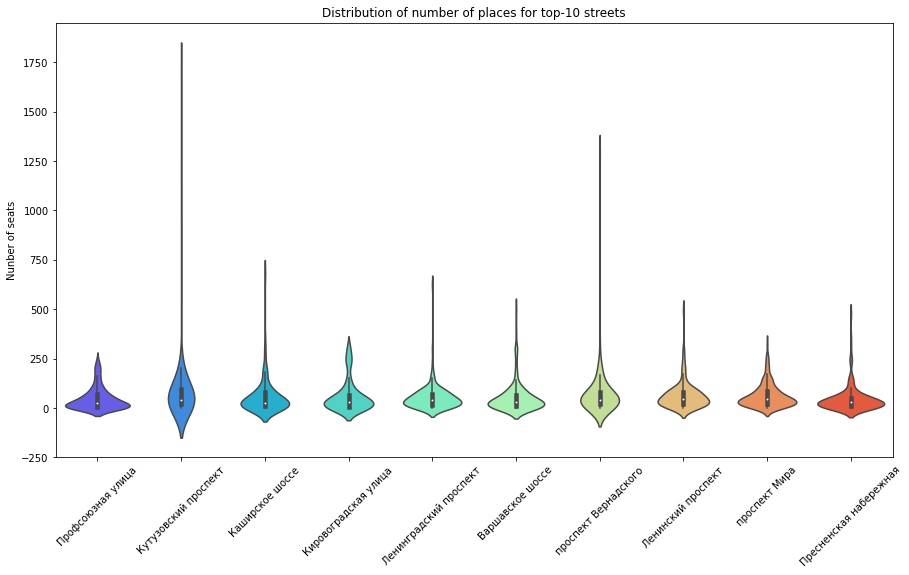

In [38]:
# Let's make violin plot to consider distribution of number of places
plt.figure(figsize = (15, 8))
sns.violinplot(x = 'street', y = 'seats', data = top_ten_data, palette = 'rainbow')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Nunber of seats')
plt.title("Distribution of number of places for top-10 streets")
plt.show()

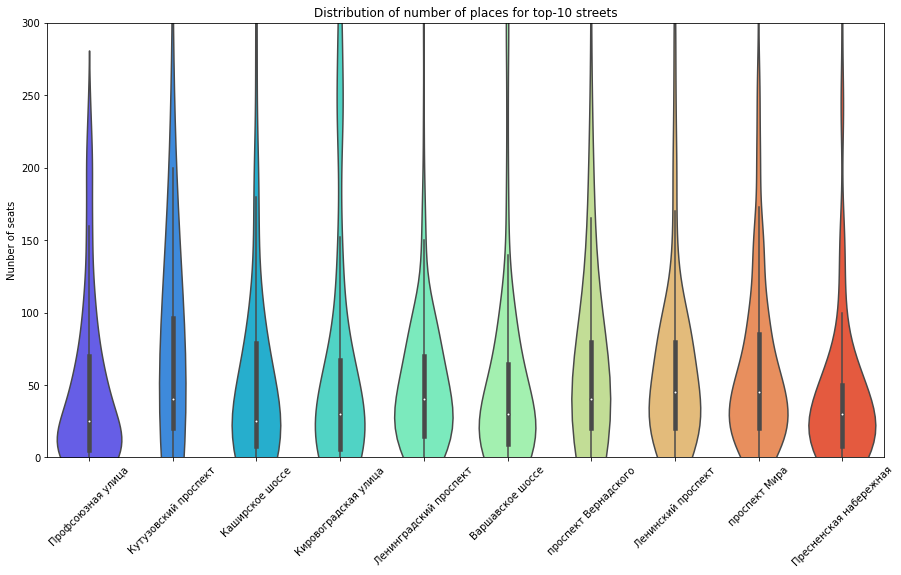

In [39]:
# The same violins in a bigger scale.
plt.figure(figsize = (15, 8))
sns.violinplot(x = 'street', y = 'seats', data = top_ten_data, palette = 'rainbow')
plt.xticks(rotation=45)
plt.ylim(0, 300)
plt.xlabel('')
plt.ylabel('Nunber of seats')
plt.title("Distribution of number of places for top-10 streets")

plt.show()

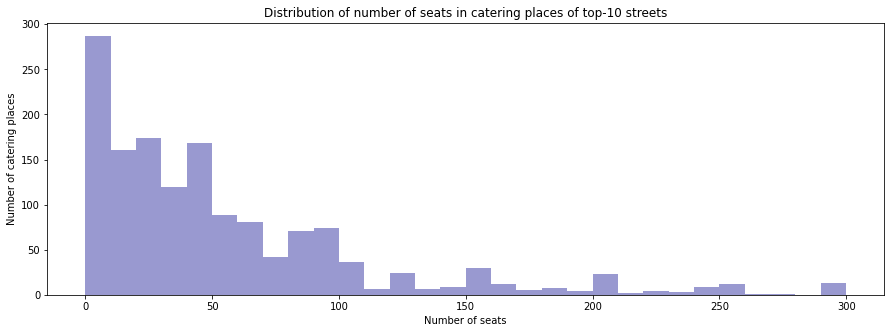

In [40]:
# Distribution of number of seats, in range from 0 to 300 seats, by 30 bins.
plt.figure(figsize=(15, 5))
sns.distplot(top_ten_data['seats'], kde = False, bins=30, hist_kws = {'range': (0, 300)}, color = 'darkblue')
plt.xlabel("Number of seats")
plt.ylabel("Number of catering places")
plt.title("Distribution of number of seats in catering places of top-10 streets")
plt.show()

The median values for the number of seats for 10 large streets are in the range from 30 to 50. 75% of all values are in the range from a little over 50 to 100 seats (100 for Kutuzovsky Prospekt). In Kutuzovsky Prospekt and Vernadsky Avenue there are places with more than a thousand seats, on Kutuzovsky number of seats can even reach 1750. As you can see on the last graph, the more seats in the place, the less such places.

## Conclusion <a id="chapter3"></a>

1. The most common type of catering as a cafe. Chain cafes are very common, although there are noticeably more non-chain cafes. The average number of seats for chain and non-chain cafes differs slightly.
2. There are also quite a lot of restaurants, canteens and fast food in the city. There are fewer restaurants and canteens than cafes, but they have twice as many seats. And in general, the more seats there are in a place, the fewer are such places.
3. For fast food, the chains are very common. There are much more seats in chain fast food than in non-chain ones.
4. In general, the majority of places in the largest streets have no more than a few dozen seats.
5. The streets of the center are in the top 10 (by the number of restaurants, cafes and bars). This was especially noticeable in  bars graph: 8 central streets penetrated the top and crowd out large avenues. Fast food and canteens - on the contrary, are more popular on the outskirts: such streets as Orekhovy Boulevard, Altufievskoe Highway, etc got into the top.

Recommendations:

Those who have the money and the desire to take risks can try to open their own cafe with robots on those streets where there are few cafes. From this step, the gentrification of some industrial zone can begin. Robots there will even look naturally. Whoever opens a restaurant there will be there first, and will also be able to compete by introducing lower prices, due to the fact that the rent will not be high. Tips for robots will be yours, it is also profitable. The main thing is that the cafe should be unique, so that there is something to lure people into the sleeping area. Organize concerts there, etc. You should start with 20-30 seats, but as you promote, be ready to increase their number.

Even better is to establish a network of bars in small lanes in the center: you can dump and delay visitors from Pokrovka and Tverskaya. Robots must be taught to juggle glasses, set fire to sambuca and ask "Do you want to repeat?" There should be 50 seats in a bar, which is the average for Moscow bars.

As for fast food, it is better to open new points in crowded places, places for 40-50, on large streets. Robots should not be very different from people, dress in accordance with the dress code, offer french fries. We need to try to force out all sorts of small non-stop pasties, diversifying the assortment, opening more points for take-away. An advantageous difference from McDonald's can be the presence of a wardrobe (with a polite robot wardrobe attendant, of course). In winter, this will save the number of seats, while at McDonald's everyone will put their jacket next to them, and those who do not want to wait with a tray near the tables will go to your place with robots.